# Lista de exercícios 10 - MNUM-7077

#### Antonio C. da Silva Júnior

In [1]:
import numpy as np
import networkx as nx

In [2]:
# Dados fornecidos:
arestas = [(1,2), (1,3), (2,4), (3,4), (3,5), (3,6), (4,5), (4,9), (5,9), (5,8), (5,6), (6,7), (7,10), (7,11), (8,9), (8,10), (9,10), (10,12), (11,12),
            (2,1), (3,1), (4,2), (4,3), (5,3), (6,3), (5,4), (9,4), (9,5), (8,5), (6,5), (7,6), (10,7), (11,7), (9,8), (10,8), (10,9), (12,10), (12,11)]

custos = [10, 7, 4, 6, 8, 5, 9, 8, 20, 10, 7, 22, 9, 6, 7, 4, 7, 13, 11,
          10, 7, 4, 6, 8, 5, 9, 8, 20, 10, 7, 22, 9, 6, 7, 4, 7, 13, 11]


# Calcula o número de nós do grafo:
nos = []
for aresta in arestas:
    if aresta[0] not in nos:
        nos.append(aresta[0])
    if aresta[1] not in nos:
        nos.append(aresta[1])
nos.sort()
n = len(nos)


# Constroi a matriz de custos:
cij = np.empty((n, n))
cij[:] = 0

for i in range(len(arestas)):
    aresta = arestas[i]
    o = aresta[0]-1
    d = aresta[1]-1
    c = custos[i]
    cij[o][d] = c
    
cij

array([[ 0., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [10.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 7.,  0.,  0.,  6.,  8.,  5.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  4.,  6.,  0.,  9.,  0.,  0.,  0.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  8.,  9.,  0.,  7.,  0., 10., 20.,  0.,  0.,  0.],
       [ 0.,  0.,  5.,  0.,  7.,  0., 22.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 22.,  0.,  0.,  0.,  9.,  6.,  0.],
       [ 0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  7.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 20.,  0.,  0.,  7.,  0.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  9.,  4.,  7.,  0.,  0., 13.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0., 11.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0.]])

In [3]:
# Matriz de adjacencias:
aij = np.where(cij > 0, 1, cij)
aij

array([[0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.]])

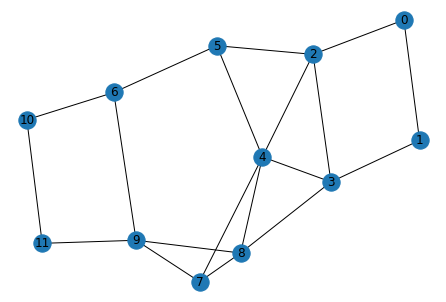

In [4]:
adj_matriz = nx.from_numpy_matrix(aij)
nx.draw(adj_matriz, with_labels=True) 

In [5]:
# Matriz de custos de Floyd:
cij_floyd = np.where(cij == 0, float('inf'), cij)
np.fill_diagonal(cij_floyd, 0)
cij_floyd

array([[ 0., 10.,  7., inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [10.,  0., inf,  4., inf, inf, inf, inf, inf, inf, inf, inf],
       [ 7., inf,  0.,  6.,  8.,  5., inf, inf, inf, inf, inf, inf],
       [inf,  4.,  6.,  0.,  9., inf, inf, inf,  8., inf, inf, inf],
       [inf, inf,  8.,  9.,  0.,  7., inf, 10., 20., inf, inf, inf],
       [inf, inf,  5., inf,  7.,  0., 22., inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, 22.,  0., inf, inf,  9.,  6., inf],
       [inf, inf, inf, inf, 10., inf, inf,  0.,  7.,  4., inf, inf],
       [inf, inf, inf,  8., 20., inf, inf,  7.,  0.,  7., inf, inf],
       [inf, inf, inf, inf, inf, inf,  9.,  4.,  7.,  0., inf, 13.],
       [inf, inf, inf, inf, inf, inf,  6., inf, inf, inf,  0., 11.],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, 13., 11.,  0.]])

In [6]:
# Matriz de trajetos de Floyd:
n = len(cij)

tij = cij_floyd.copy()
for i in range(n):
    tij[i,:] = i
    
tij

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
       [ 9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.]])

In [7]:
# Algoritmo de Floyd:
for k in range(n):
    for i in range(n):
        for j in range(n):
            if i != k and j != k:
                custo_ik_kj = cij_floyd[i][k] + cij_floyd[k][j]
                custo_ij = cij_floyd[i][j]
                if custo_ik_kj < custo_ij:
                    cij_floyd[i][j] = custo_ik_kj
                    tij[i][j] = tij[k][j]

In [8]:
cij_floyd

array([[ 0., 10.,  7., 13., 15., 12., 34., 25., 21., 28., 40., 41.],
       [10.,  0., 10.,  4., 13., 15., 28., 19., 12., 19., 34., 32.],
       [ 7., 10.,  0.,  6.,  8.,  5., 27., 18., 14., 21., 33., 34.],
       [13.,  4.,  6.,  0.,  9., 11., 24., 15.,  8., 15., 30., 28.],
       [15., 13.,  8.,  9.,  0.,  7., 23., 10., 17., 14., 29., 27.],
       [12., 15.,  5., 11.,  7.,  0., 22., 17., 19., 21., 28., 34.],
       [34., 28., 27., 24., 23., 22.,  0., 13., 16.,  9.,  6., 17.],
       [25., 19., 18., 15., 10., 17., 13.,  0.,  7.,  4., 19., 17.],
       [21., 12., 14.,  8., 17., 19., 16.,  7.,  0.,  7., 22., 20.],
       [28., 19., 21., 15., 14., 21.,  9.,  4.,  7.,  0., 15., 13.],
       [40., 34., 33., 30., 29., 28.,  6., 19., 22., 15.,  0., 11.],
       [41., 32., 34., 28., 27., 34., 17., 17., 20., 13., 11.,  0.]])

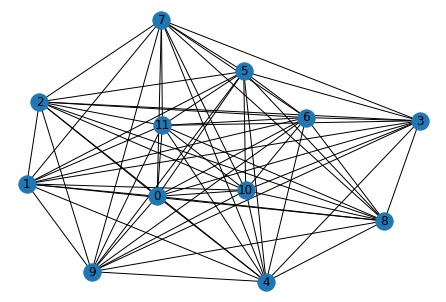

In [9]:
adj_matriz_floyd = nx.from_numpy_matrix(cij_floyd)
nx.draw(adj_matriz_floyd, with_labels=True) 

In [10]:
tij

array([[ 0.,  0.,  0.,  2.,  2.,  2.,  5.,  4.,  3.,  8.,  6.,  9.],
       [ 1.,  1.,  3.,  1.,  3.,  2.,  9.,  8.,  3.,  8.,  6.,  9.],
       [ 2.,  3.,  2.,  2.,  2.,  2.,  5.,  4.,  3.,  8.,  6.,  9.],
       [ 2.,  3.,  3.,  3.,  3.,  2.,  9.,  8.,  3.,  8.,  6.,  9.],
       [ 2.,  3.,  4.,  4.,  4.,  4.,  9.,  4.,  3.,  7.,  6.,  9.],
       [ 2.,  3.,  5.,  2.,  5.,  5.,  5.,  4.,  3.,  7.,  6.,  9.],
       [ 2.,  3.,  5.,  8.,  7.,  6.,  6.,  9.,  9.,  6.,  6., 10.],
       [ 2.,  3.,  4.,  8.,  7.,  4.,  9.,  7.,  7.,  7.,  6.,  9.],
       [ 2.,  3.,  3.,  8.,  3.,  2.,  9.,  8.,  8.,  8.,  6.,  9.],
       [ 2.,  3.,  3.,  8.,  7.,  4.,  9.,  9.,  9.,  9.,  6.,  9.],
       [ 2.,  3.,  5.,  8.,  7.,  6., 10.,  9.,  9.,  6., 10., 10.],
       [ 2.,  3.,  3.,  8.,  7.,  4., 10.,  9.,  9., 11., 11., 11.]])

In [11]:
# Identificar vétices com número ímpar de arestas:
n_arestas = []
for i in range(n):
    count = 0
    for j in range(n):
        if cij[i][j] > 0:
            count += 1
    n_arestas.append(count)


vertices_impares = []
for i in range(len(n_arestas)):
    if n_arestas[i] % 2 != 0:
        vertices_impares.append(i)
        
vertices_impares

[4, 5, 6, 7]

In [12]:
# Achar o matching: juntar os nós 2 a 2 minimizando o custo total:
vertices_verificados = []
arestas_selecionadas = []
custos_arestas = []

while len(vertices_verificados) < len(vertices_impares):
    menor_custo = float('inf')
    aresta_menor_custo = None
    vertices_menor_custo = None
    for vi in vertices_impares:
        if vi not in vertices_verificados:
            for vj in vertices_impares:
                if vj not in vertices_verificados:
                    if vi != vj:
                        custo = cij_floyd[vi][vj]
                        if custo < menor_custo:
                            menor_custo = custo
                            aresta_menor_custo = (vi,vj)
                            vertices_menor_custo = [vi,vj]    
    vertices_verificados += vertices_menor_custo
    arestas_selecionadas.append(aresta_menor_custo)
    custos_arestas.append(menor_custo)

In [13]:
arestas_selecionadas # matching escolhido

[(4, 5), (6, 7)]

In [14]:
custos_arestas

[7.0, 13.0]

In [15]:
# Recupera o trajeto pela matriz de trajetos de Floyd:
def recuperar_trajeto_floyd(no_inicial, no_final, tij):
    trajeto = []
    c = int(tij[no_inicial][no_final])
    while len(trajeto) < len(tij):
        if c != no_inicial:
            a = (no_inicial, c)
            trajeto.append(a)
            no_inicial = c
        else:
            a = (no_inicial, no_final)
            trajeto.append(a)
            no_inicial = c
            break
    return trajeto

In [16]:
# Recupera os trajetos e inclui as novas ligações na matriz de adjacência:
novas_arestas = []
for aresta in arestas_selecionadas:
    trajeto = recuperar_trajeto_floyd(aresta[0], aresta[1], tij)
    novas_arestas += trajeto

novas_arestas

[(4, 5), (6, 9), (9, 7)]

In [17]:
for aresta in novas_arestas:
    aij[aresta[0]][aresta[1]] += 1
    aij[aresta[1]][aresta[0]] += 1

In [18]:
aij

array([[0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 2., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 2., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 2., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 2., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 2., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.]])

In [19]:
def obter_circuitos(aij):
    n = len(aij)
    circuitos = []
    for i in range(n):
        circuito = []
        loop = True
        while loop:
            for j in range(n):
                a = aij[i][j]
                if a > 0:
                    circuito.append((i,j))
                    aij[i][j] -= 1
                    aij[j][i] -= 1
                    break
            if a == 0:
                loop = False
                if len(circuito) > 0:
                    circuitos.append(circuito)
            i = j
        if sum(list(sum(aij))) == 0:
            break
    return circuitos

In [20]:
circuitos = obter_circuitos(aij)
circuitos

[[(0, 1), (1, 3), (3, 2), (2, 0)],
 [(2, 4), (4, 3), (3, 8), (8, 4), (4, 5), (5, 2)],
 [(4, 5), (5, 6), (6, 9), (9, 6), (6, 10), (10, 11), (11, 9), (9, 7), (7, 4)],
 [(7, 8), (8, 9), (9, 7)]]

In [21]:
circuito_euleriano = [(0, 1), (1, 3), (3, 2), (2, 4), (4, 5), (5, 6), (6, 9), (9, 6), (6, 10), (10, 11), (11, 9), (9, 7), (7, 8), (8, 9), (9, 7), (7, 4), (4, 3), (3, 8), (8, 4), (4, 5), (5, 2), (2, 0)]
circuito_euleriano

[(0, 1),
 (1, 3),
 (3, 2),
 (2, 4),
 (4, 5),
 (5, 6),
 (6, 9),
 (9, 6),
 (6, 10),
 (10, 11),
 (11, 9),
 (9, 7),
 (7, 8),
 (8, 9),
 (9, 7),
 (7, 4),
 (4, 3),
 (3, 8),
 (8, 4),
 (4, 5),
 (5, 2),
 (2, 0)]